In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv("IMDB.csv")

In [3]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])

In [4]:
X = df['review'].values
y = df['label'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
vocab_size = 10000
embedding_dim = 64
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [7]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [8]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

C:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/10
1250/1250 - 17s - 13ms/step - accuracy: 0.8111 - loss: 0.3983 - val_accuracy: 0.8625 - val_loss: 0.3166
Epoch 2/10
1250/1250 - 12s - 10ms/step - accuracy: 0.8876 - loss: 0.2750 - val_accuracy: 0.8753 - val_loss: 0.2946
Epoch 3/10
1250/1250 - 24s - 19ms/step - accuracy: 0.9023 - loss: 0.2455 - val_accuracy: 0.8701 - val_loss: 0.3029
Epoch 4/10
1250/1250 - 12s - 10ms/step - accuracy: 0.9148 - loss: 0.2185 - val_accuracy: 0.8739 - val_loss: 0.3082
Epoch 5/10
1250/1250 - 21s - 17ms/step - accuracy: 0.9229 - loss: 0.1995 - val_accuracy: 0.8718 - val_loss: 0.3128
Epoch 6/10
1250/1250 - 20s - 16ms/step - accuracy: 0.9280 - loss: 0.1785 - val_accuracy: 0.8693 - val_loss: 0.3380
Epoch 7/10
1250/1250 - 12s - 10ms/step - accuracy: 0.9337 - loss: 0.1559 - val_accuracy: 0.8574 - val_loss: 0.4197
Epoch 8/10
1250/1250 - 21s - 17ms/step - accuracy: 0.9429 - loss: 0.1360 - val_accuracy: 0.8582 - val_loss: 0.4946
Epoch 9/10
1250/1250 - 21s - 16ms/step - accuracy: 0.9511 - loss: 0.1182 - val_a

In [12]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8584 - loss: 0.5315
Test Accuracy: 0.8595


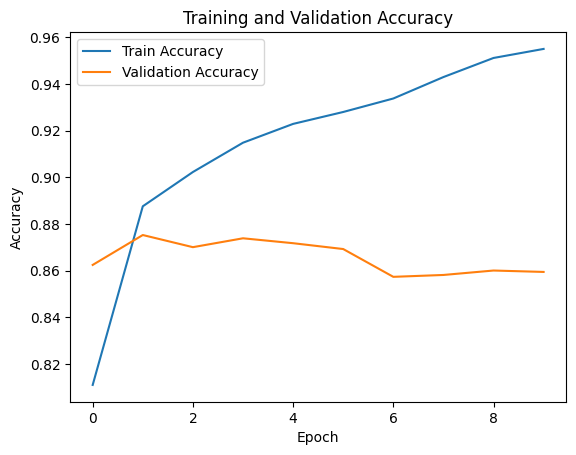

In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

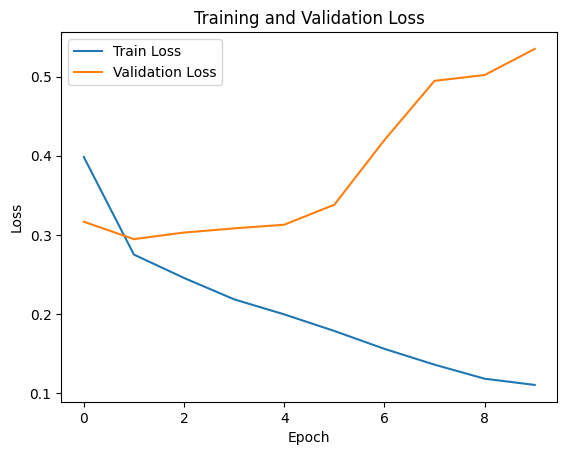

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [15]:
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


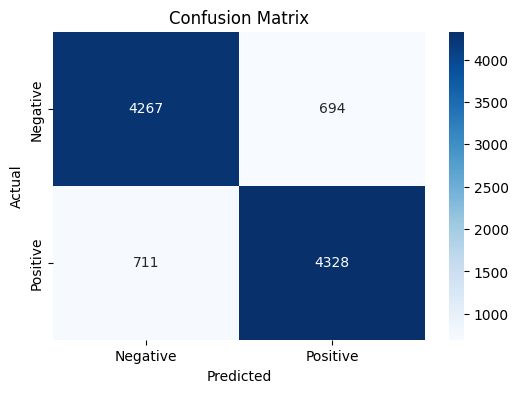

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()